# Rainfall predictor
we will use Linear Regression to predict the amount of rainfall. Linear Regression tells us how many inches of rainfall we can expect.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv("D:\\pkworkspace\\100DaysDataScience\\datasets\\austin_weather.csv")
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


## Explore Data

In [4]:
data.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [6]:
#drop unnecessary column
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',
                 'SeaLevelPressureLowInches'], axis = 1)

In [7]:
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16,T


In [10]:
data.shape

(1319, 17)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempHighF                  1319 non-null   int64 
 1   TempAvgF                   1319 non-null   int64 
 2   TempLowF                   1319 non-null   int64 
 3   DewPointHighF              1319 non-null   object
 4   DewPointAvgF               1319 non-null   object
 5   DewPointLowF               1319 non-null   object
 6   HumidityHighPercent        1319 non-null   object
 7   HumidityAvgPercent         1319 non-null   object
 8   HumidityLowPercent         1319 non-null   object
 9   SeaLevelPressureAvgInches  1319 non-null   object
 10  VisibilityHighMiles        1319 non-null   object
 11  VisibilityAvgMiles         1319 non-null   object
 12  VisibilityLowMiles         1319 non-null   object
 13  WindHighMPH                1319 non-null   object
 14  WindAvgM

In [18]:
data.count()

TempHighF                    1319
TempAvgF                     1319
TempLowF                     1319
DewPointHighF                1319
DewPointAvgF                 1319
DewPointLowF                 1319
HumidityHighPercent          1319
HumidityAvgPercent           1319
HumidityLowPercent           1319
SeaLevelPressureAvgInches    1319
VisibilityHighMiles          1319
VisibilityAvgMiles           1319
VisibilityLowMiles           1319
WindHighMPH                  1319
WindAvgMPH                   1319
WindGustMPH                  1319
PrecipitationSumInches       1319
dtype: int64

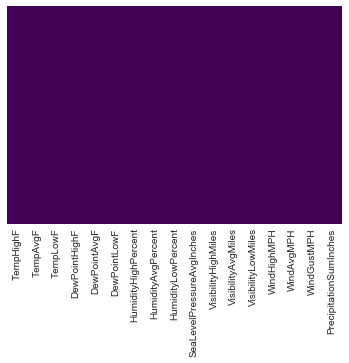

In [20]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='viridis')

## Data Cleaning

In [21]:
# replace 'T' --> trace rainfall with 0
data = data.replace('T', 0.0)

#replace '-' with 0. '-' means null value
data = data.replace('-', 0.0)


In [24]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.91,10,10,10,13,4,20,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempHighF                  1319 non-null   int64 
 1   TempAvgF                   1319 non-null   int64 
 2   TempLowF                   1319 non-null   int64 
 3   DewPointHighF              1319 non-null   object
 4   DewPointAvgF               1319 non-null   object
 5   DewPointLowF               1319 non-null   object
 6   HumidityHighPercent        1319 non-null   object
 7   HumidityAvgPercent         1319 non-null   object
 8   HumidityLowPercent         1319 non-null   object
 9   SeaLevelPressureAvgInches  1319 non-null   object
 10  VisibilityHighMiles        1319 non-null   object
 11  VisibilityAvgMiles         1319 non-null   object
 12  VisibilityLowMiles         1319 non-null   object
 13  WindHighMPH                1319 non-null   object
 14  WindAvgM

## import linear Regresson

In [41]:
from sklearn.linear_model import LinearRegression

In [26]:
x = data.drop(['PrecipitationSumInches'], axis = 1)
x.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16


In [27]:
x.shape

(1319, 16)

In [34]:
#target data
y = data['PrecipitationSumInches']
y.head()

0    0.46
1       0
2       0
3       0
4       0
Name: PrecipitationSumInches, dtype: object

In [35]:
y.shape

(1319,)

In [36]:
# reshape the y in 2D vector
y = y.values.reshape(-1,1)


In [38]:
y.shape

(1319, 1)

In [39]:
#plot a graph on random day
dayIndex = 800
days = [i for i in range(y.size)]
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [42]:
#initialize linear regresssion
clf = LinearRegression()

In [43]:
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# give random input
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], 
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]]) 
inp

array([[74.  ],
       [60.  ],
       [45.  ],
       [67.  ],
       [49.  ],
       [43.  ],
       [33.  ],
       [45.  ],
       [57.  ],
       [29.68],
       [10.  ],
       [ 7.  ],
       [ 2.  ],
       [ 0.  ],
       [20.  ],
       [ 4.  ],
       [31.  ]])

In [54]:
inp = inp.reshape(1, -1)
inp

array([[74.  , 60.  , 45.  , 67.  , 49.  , 43.  , 33.  , 45.  , 57.  ,
        29.68, 10.  ,  7.  ,  2.  ,  0.  , 20.  ,  4.  , 31.  ]])

In [55]:
inp.shape

(1, 17)

In [56]:
#predict the model
clf.predict(inp)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 17)